### EDA Analysis 

The EDA for the "Rossmann Pharmaceuticals Sales Forecast" dataset focuses on uncovering trends and patterns in sales across stores and time. Key steps include analyzing time series data to identify seasonality, holidays, and promotion effects on sales, and examining store-level characteristics such as type, location, and competition. Descriptive statistics and visualizations like histograms, box plots, and correlation heatmaps help understand the distribution and relationships among features. Missing values are addressed, and outliers are identified to ensure data quality. Feature engineering, including creating temporal variables (e.g., day of the week, month) and aggregated metrics (e.g., rolling averages), further enhances insights for accurate forecasting.

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.eda_analysis import *
from scripts.logger import setup_logger

In [4]:
#logger
logger = setup_logger('eda_logger', '../logs/eda.log')

In [5]:
# loading data 
df_train = pd.read_csv('../data/clean/train.csv',low_memory=False, index_col=False)
df_test=pd.read_csv('../data/clean/test.csv', low_memory=False, index_col=False)

In [6]:
# log the data loading
logger.info('Training, test, and store data loaded.')

In [7]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [8]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [10]:
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854361,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352748,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [11]:
df_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [12]:
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

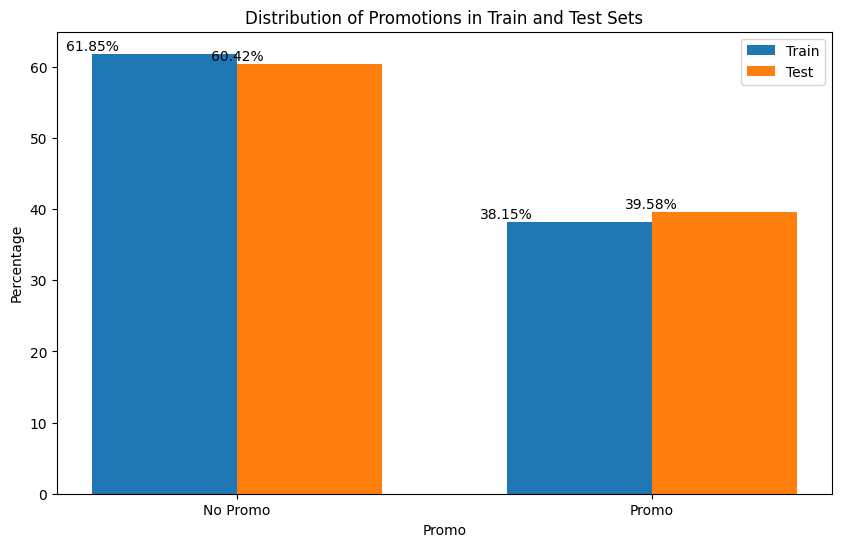

In [13]:
#plot_promo_distribution(df_train, df_test)
compare_promo_distribution(df_train, df_test)

as we can see from the pie plot the distribution of the promo for both training and test data are quite similar 

### 2. Check & compare sales behavior before, during, and after holidays

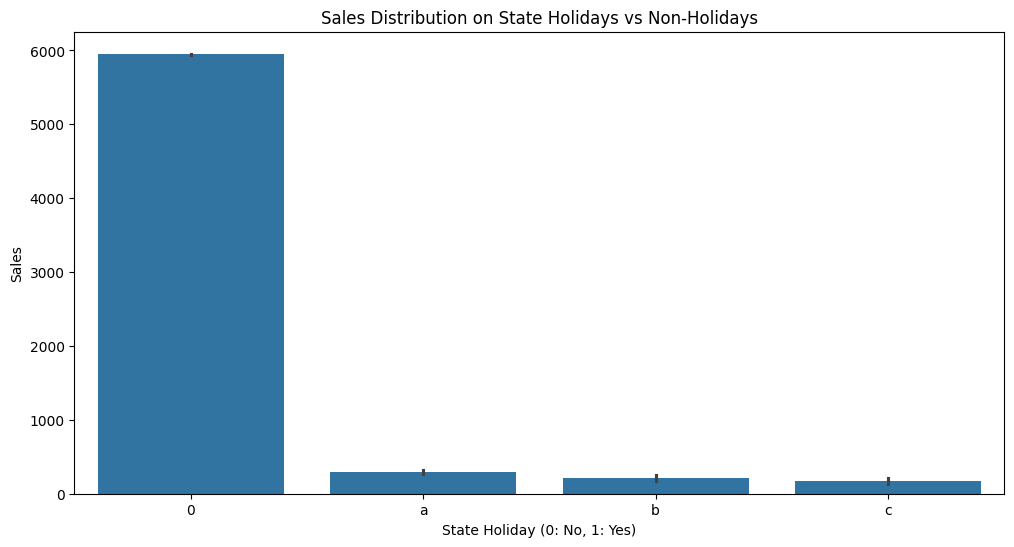

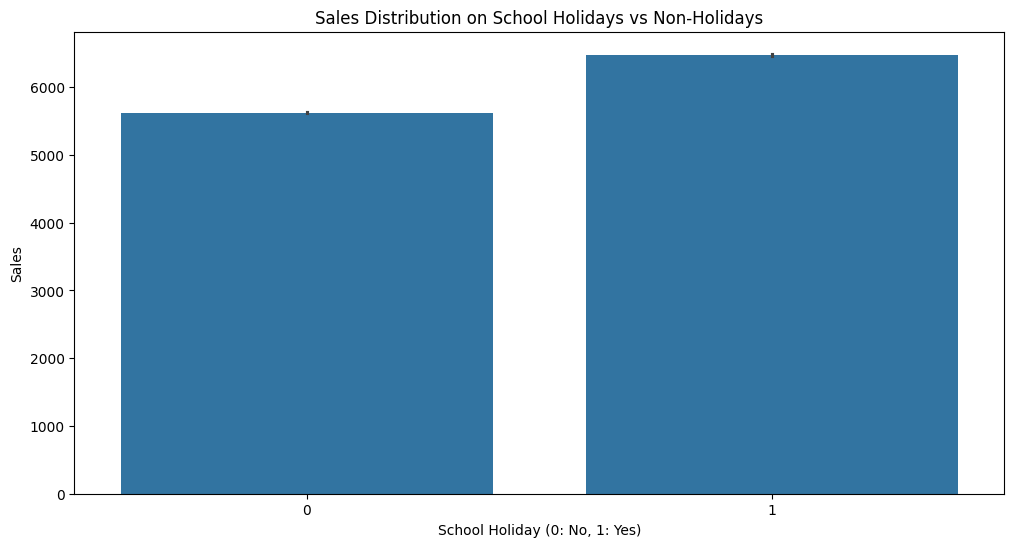

In [14]:
analyze_holiday_sales(df_train)

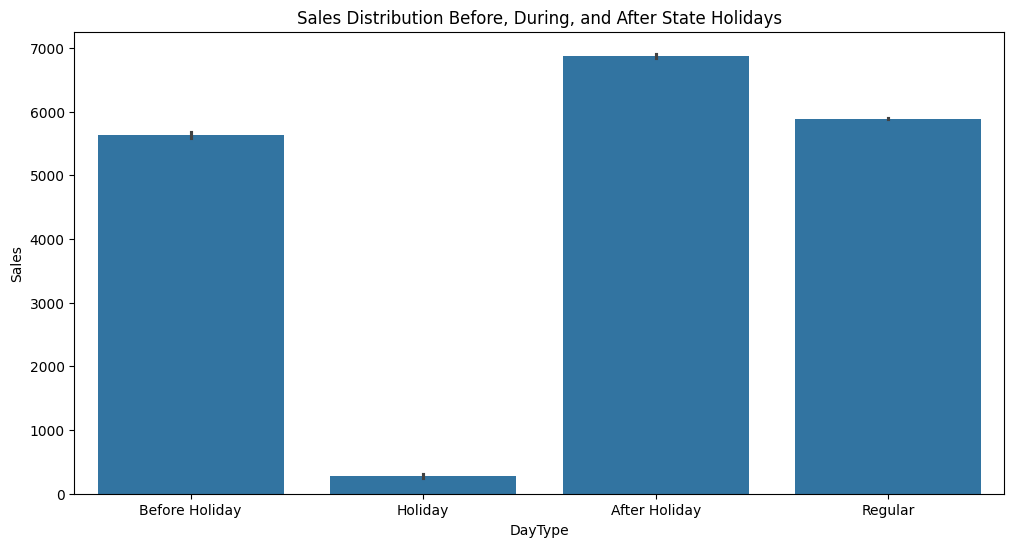

In [15]:
# sales distribution before, during and after holidays
holiday_sales(df_train)

### 3. Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

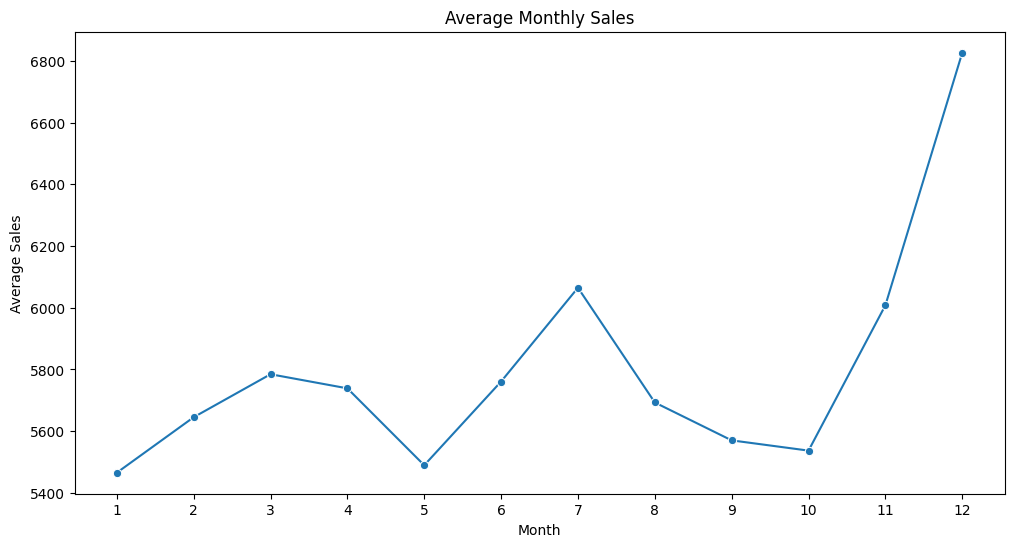

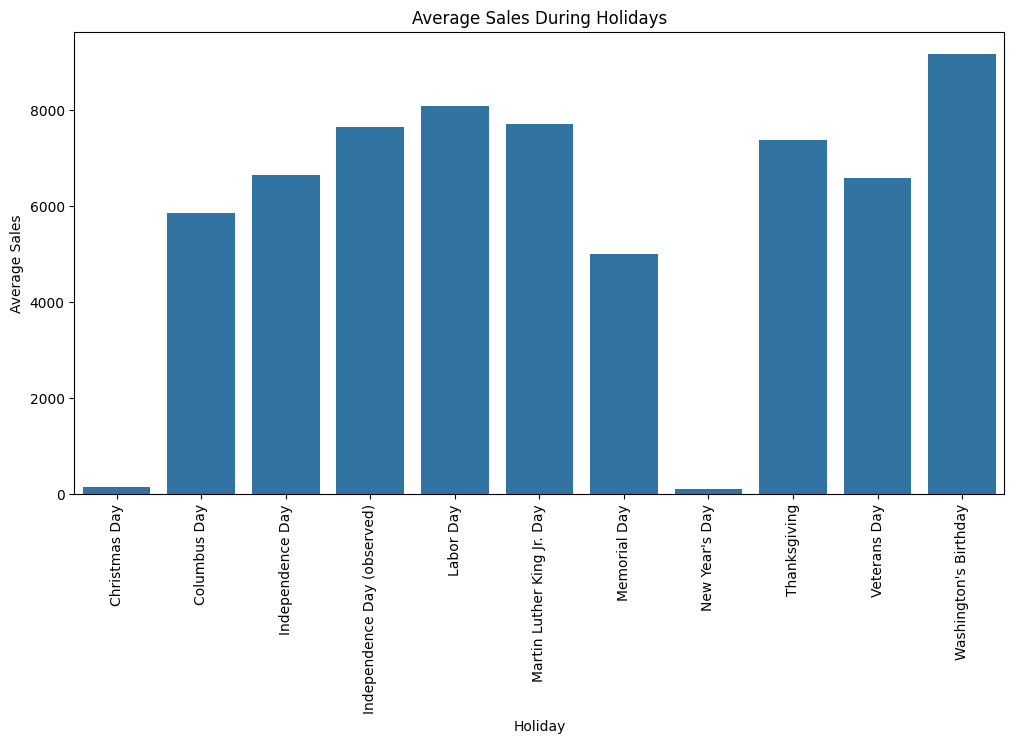

In [16]:
analyze_seasonal_behavior(df_train)

the seasonal purchase behavior during Holidays shows that:
- Sales during holidays generally exhibit varying trends based on the significance and consumer behavior associated with each holiday
- Washington’s Birthday generates the highest average sales
- Christmas Day and New Year’s Day have the lowest average sales, with near-zero sales, indicating very low activity on these holidays.

### 4. correlation between sales and the number of customers?

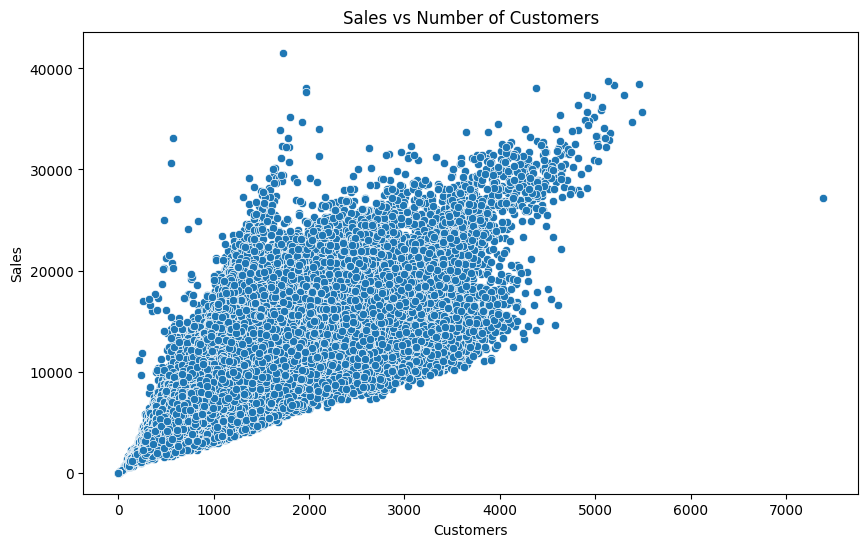

Correlation between Sales and Customers: 0.8947107733016958


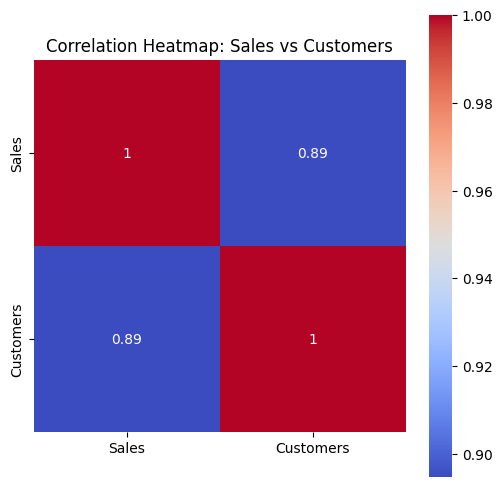

In [17]:
analyze_sales_customers_correlation(df_train)
logger.info("correlation between sales and number of customers")

- as we can see from the correlation matrix, Sales is highly correlated to Customers

### 5. How does promo affect sales? Are the promos attracting more customers? How
does it affect already existing customers?

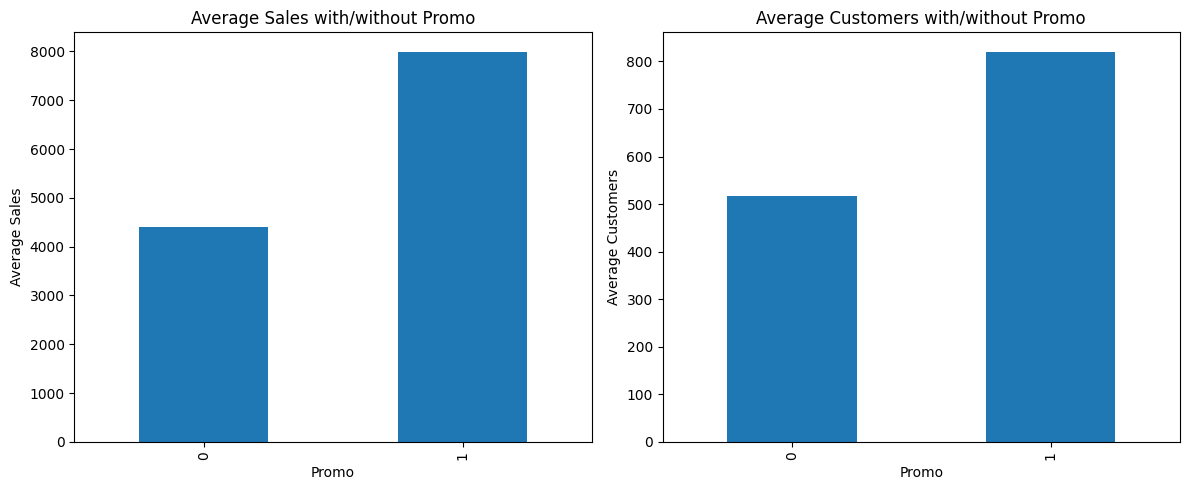

In [18]:
analyze_promo_effect(df_train)

- Both sales volume and customer count increase while using promotion

### 6. Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

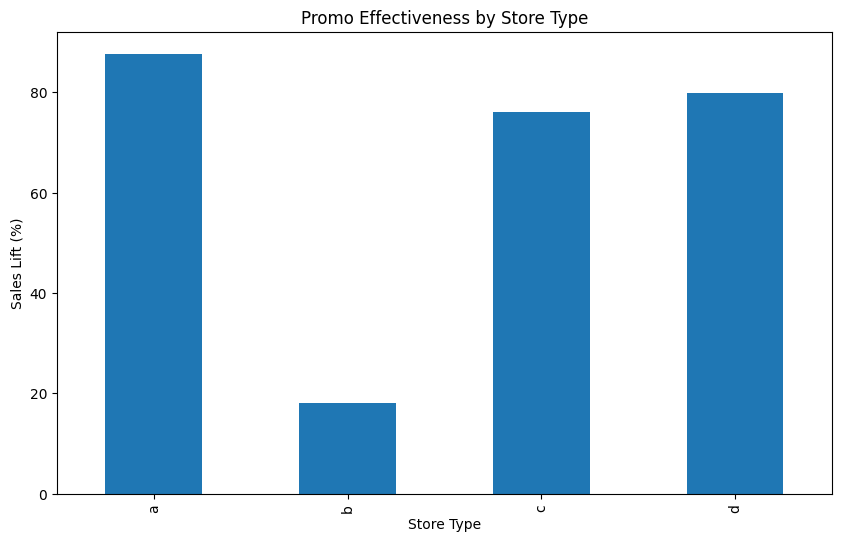

Top 10 stores where promos are most effective:
Store
198     2.258195
607     1.889831
543     1.759064
575     1.737234
271     1.620440
693     1.611931
96      1.575477
1108    1.567058
552     1.562815
635     1.559672
dtype: float64


In [19]:
enhance_promo_analysis(df_train)

- promotions have low impact on store type b

### 7. Trends of customer behavior during store opening and closing times

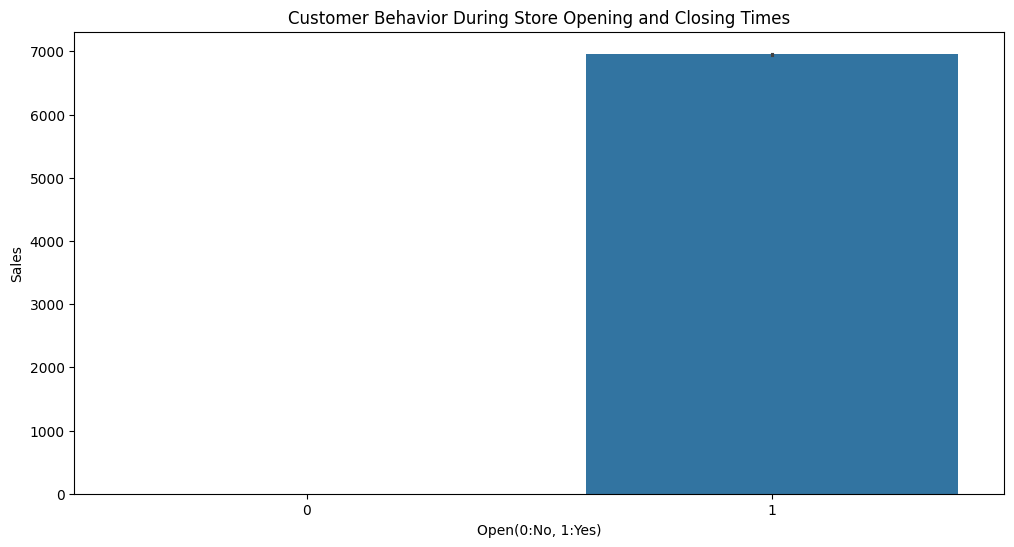

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Open', y='Sales', data=df_train)
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.xlabel('Open(0:No, 1:Yes)')
plt.ylabel('Sales')
plt.show()

- No customer visits when the store is closed 

Average Sales by Day of Week

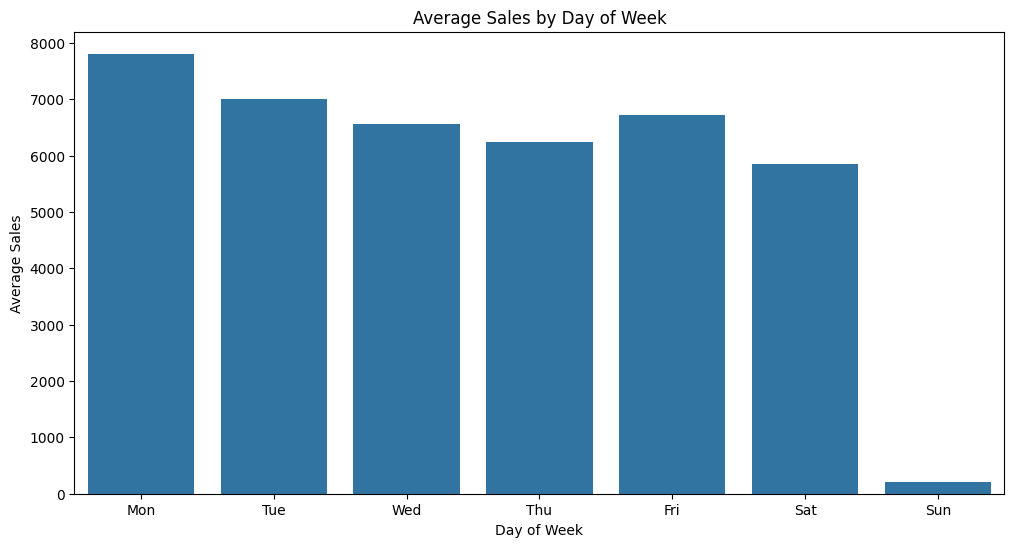

Proportion of stores open by day of week:
DayOfWeek
1    0.950459
2    0.988309
3    0.974400
4    0.923199
5    0.950598
6    0.995357
7    0.024826
Name: Open, dtype: float64

Average sales for open stores by day of week:
DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64


In [21]:
# weekly sales analysis
analyze_store_hours(df_train)

- decline in sales on weekends

### 8. Which stores are open on all weekdays? How does that affect their sales on weekends?

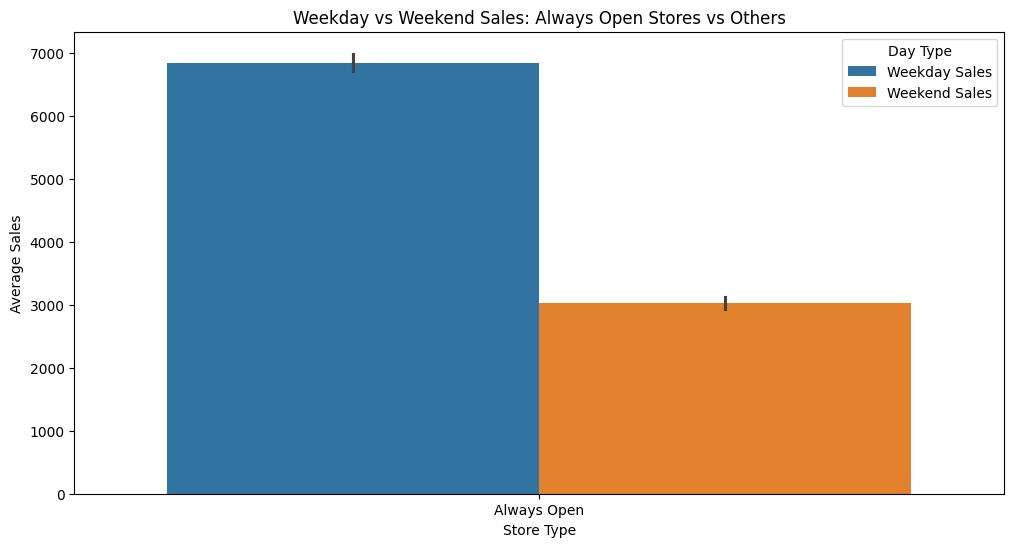

Summary Statistics:
            Weekday Sales              Weekend Sales             
                     mean       median          mean       median
Store Type                                                       
Always Open   6850.073688  6530.900593   3031.040139  2778.347015


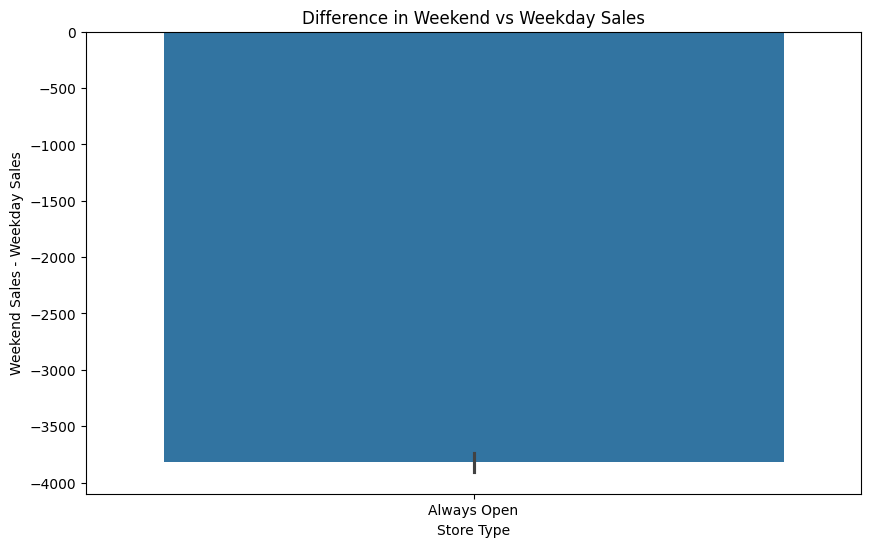


Average difference in Weekend vs Weekday sales:
Store Type
Always Open   -3819.033549
Name: Weekend_Weekday_Diff, dtype: float64


In [22]:
analyze_weekday_open_stores(df_train)

### 9. Check how the assortment type affects sale

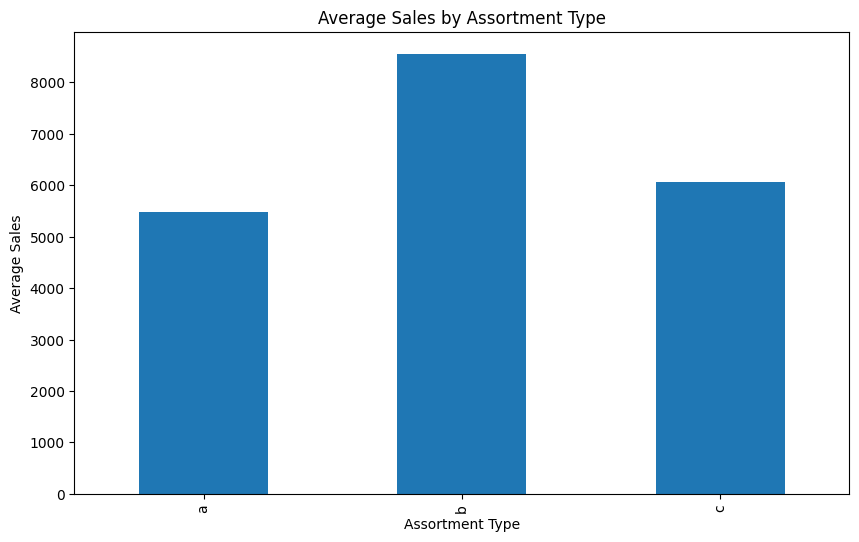

In [23]:
analyze_assortment_effect(df_train)

- stores with assortment type 'b' have the highest average sales

### 10. How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

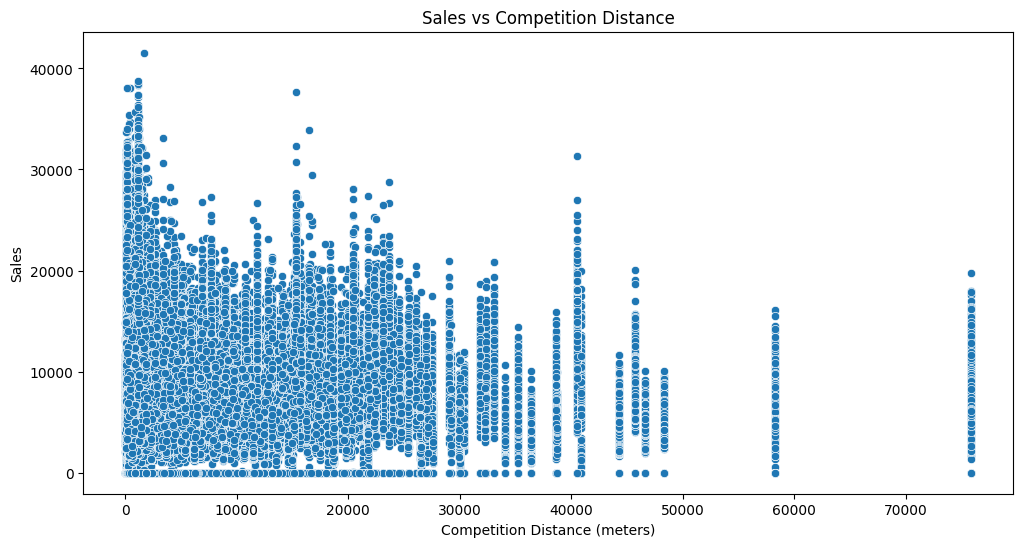

Sales vs Competition Distance (Correlation: -0.02)


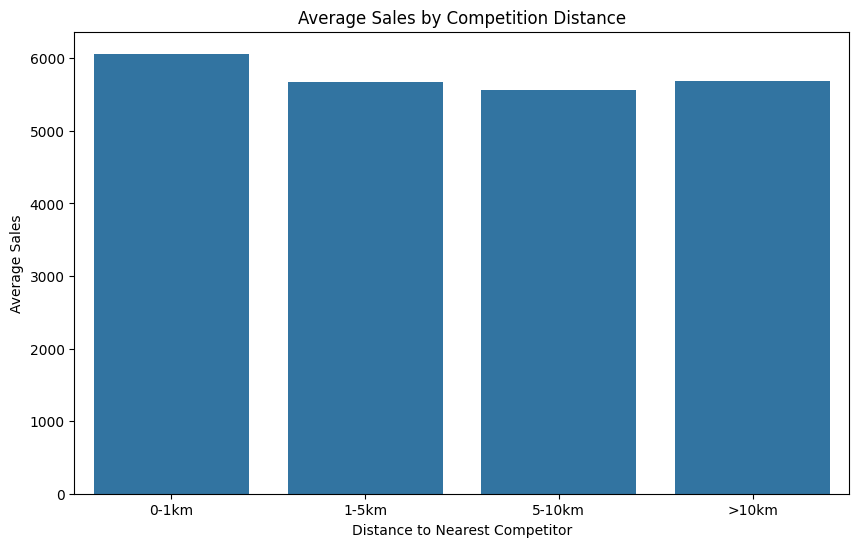

In [24]:
analyze_competition_distance(df_train)

- Stores with the smallest competition distance have the highest sales. 
- The scatter plot shows that a most of the stores have nearby competition, yet maintain a wide range of sales, suggesting that proximity to competitors does not always negatively impact sales.
- There is a dense cluster of stores with sales ranging from low to moderate at shorter distances, though high sales are observed across various competition distances. there is no clear trend of increased sales with greater competition distance, indicating that factors other than competition proximity may have a stronger influence on sales performance. 

### 11. the effect of new competitors

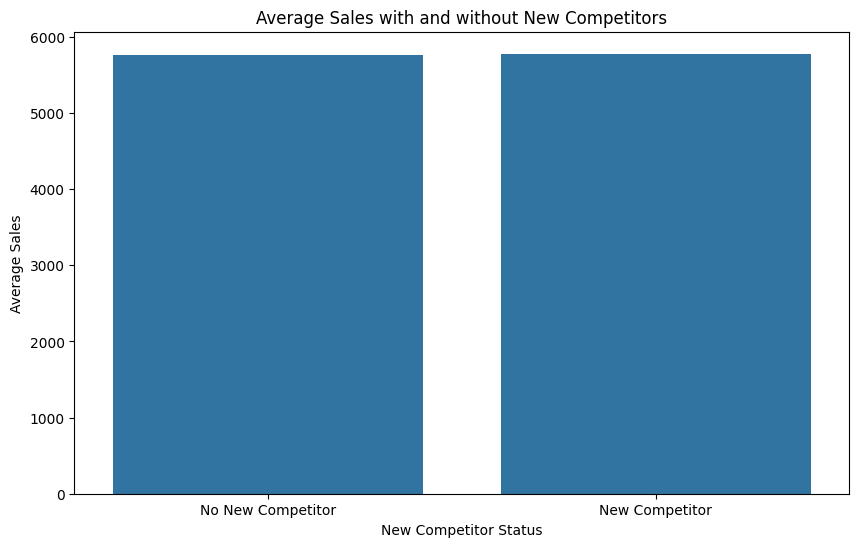

In [25]:
# effect of new competitors 
analyze_new_competitors(df_train)

- The entry of new competitors into the market did not significantly affect average sales performance.